In [1]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram

In [2]:
def decrement(n,qc):
    controls = [x for x in range(n-1)]
    qc.x(controls)
    for p in range(n-2):
        qc.mcx(controls,controls[-1] + 1)
        qc.x(controls[-1])
        controls.pop()
    qc.cx(0,1)

def binary_entry(b_str,n,qc):
    for p in range(n):
        if(b_str[p]==1):
            qc.x(n-p-1)
    qc.barrier()

def QasmRunning(qc):
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc,backend).result().get_counts()
    return result

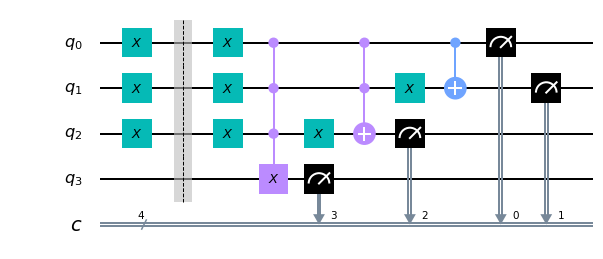

In [3]:
n = 4
qc_i = QuantumCircuit(n,n)
binary_entry([0,1,1,1],n,qc_i)
decrement(n,qc_i)
qc_i.measure(range(n),range(n))
qc_i.draw('mpl') 

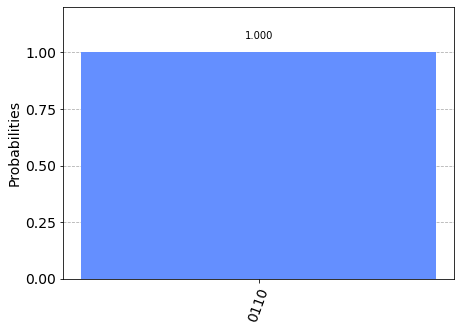

In [4]:
r = QasmRunning(qc_i)
plot_histogram(r)